
<img src="https://www.machinelearningplus.com/wp-content/uploads/2017/09/linear_vs_logistic_regression.jpg" class="center" width="600" >
<h4 align="right">Source: Machine Learning Plus</h4>
## <div style="text-align: center" >Logistic Regression with Titanic Dataset</div>
<div style="text-align: center"> Being a part of Kaggle gives me unlimited access to learn, share and grow as a Data Scientist. In this kernel, I want to solve <font color="red"><b>Titanic competition</b></font>, a popular machine learning dataset using <font color="red"><b>Logistic Regression Classifier</b></font>. This kernel is a part of my machine learning series articles. If you would like to find out more about other machine learning models, please checkout this <a href="https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic/edit/run/13339359">this</a> kernel. </b> I will also describe how best to evaluate model results along with many other tips. So let's get started.</div>


***
<div style="text-align:center"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b>. Any feedback/constructive criticism would be genuinely appreciated. <b>This notebook is always a work in progress. So, please stay tuned for more to come.</b></div>


<div style="text-align:center">If you like this notebook or find this notebook helpful, Please feel free to <font color="red"><b>UPVOTE</b></font> and/or <font color="Blue"><b>leave a comment.</b></font></div><br>

<div style="text-align: center"><b>You can also Fork and Run this kernel from <a href="https://github.com/masumrumi">Github</b></a>
    </div>

### <div style="text-align: center">Stay Tuned for More to Come!!</div>

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns


## Importing the datasets
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")


## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("../input/")) 


Bad key "text.kerning_factor" on line 4 in
/Users/masumrumi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


['test.csv', 'train.csv', 'gender_submission.csv']


**> Sample train dataset**

In [2]:
## Take a look at the overview of the dataset. 
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


**> Sample test dataset**

In [3]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.00,0,0,248744,13.000,NaN,S
167,1059,3,"Ford, Mr. Edward Watson",male,18.00,2,2,W./C. 6608,34.375,NaN,S
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.00,0,0,CA 31352,21.000,NaN,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NaN,S
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.00,0,0,2696,7.225,NaN,C


I am going to do all sorts of preparation ( including data munging, preparation, replacing NULL values, standard scaling...dummy variables) on the Titanic dataset to make it ready for the machine learning algorithm. If you would like to find out how I did it step-by-step. Please click <a href="https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic"> here.</a>

In [4]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId

## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

all_data.Cabin = [i[0] for i in all_data.Cabin]

with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]

# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 

## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## Title
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)


train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]


#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 0)

# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
train_x = sc.fit_transform(X_train)
## transforming "test_x"
test_x = sc.transform(X_test)

## transforming "The testset"
test = sc.transform(test)

## changing calculated_fare type
train.calculated_fare = train.calculated_fare.astype(float)

## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)

<h1>Logistic Regression Classifier</h1>

**Logistic Regression**. Logistic regression is a famous classifier still used today frequently despite its age. It is a regression similar to **Linear regression**, yet operates as a classifier. To understand logistic regression, we should have some idea about linear regression. Let's have a look at it. 

Hopefully, we all know that any linear equation can be written in the form of...

# $$ {y} = mX + b $$

* Here, m = slope of the regression line. it represents the relationship between X and y. 
* b = y-intercept. 
* x and y are the points location in x_axis and y_axis respectively. 
<br/>

If you want to know how, check out this [video](https://www.khanacademy.org/math/algebra/two-var-linear-equations/writing-slope-intercept-equations/v/graphs-using-slope-intercept-form). So, this slope equation can also be written as...

## $$ y = \beta_0 + \beta_1 x + \epsilon \\ $$

This is the equation for a simple linear regression.
here,
* y = Dependent variable. 
* $\beta_0$ = the intercept, it is constant. 
* $\beta_1$ = Coefficient of independent variable. 
* $x$ = Indepentent variable. 
* $ \epsilon$ = error or residual. 


We use this function to predict the value of a dependent variable with the help of only one independent variable. Therefore this regression is called **Simple Linear Regression.** 

Similar to **Simple Linear Regression**, there is **Multiple Linear Regression** which can be used to predict dependent variable using multiple independent variables. Let's look at the equation for **Multiple Linear Regression**, 

## $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$


If you would like to know more about **Linear Regression** checkout this [kernel](https://www.kaggle.com/masumrumi/a-stats-analysis-and-ml-workflow-of-house-pricing). 

So, we know/reviewed a bit about linear regression, and therefore we know how to deal with data that looks like this, 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width="600">

Here the data point's in this graph is continuous and therefore the problem is a regression one. However, what if we have data that when plotted in a scatter graph, looks like this...


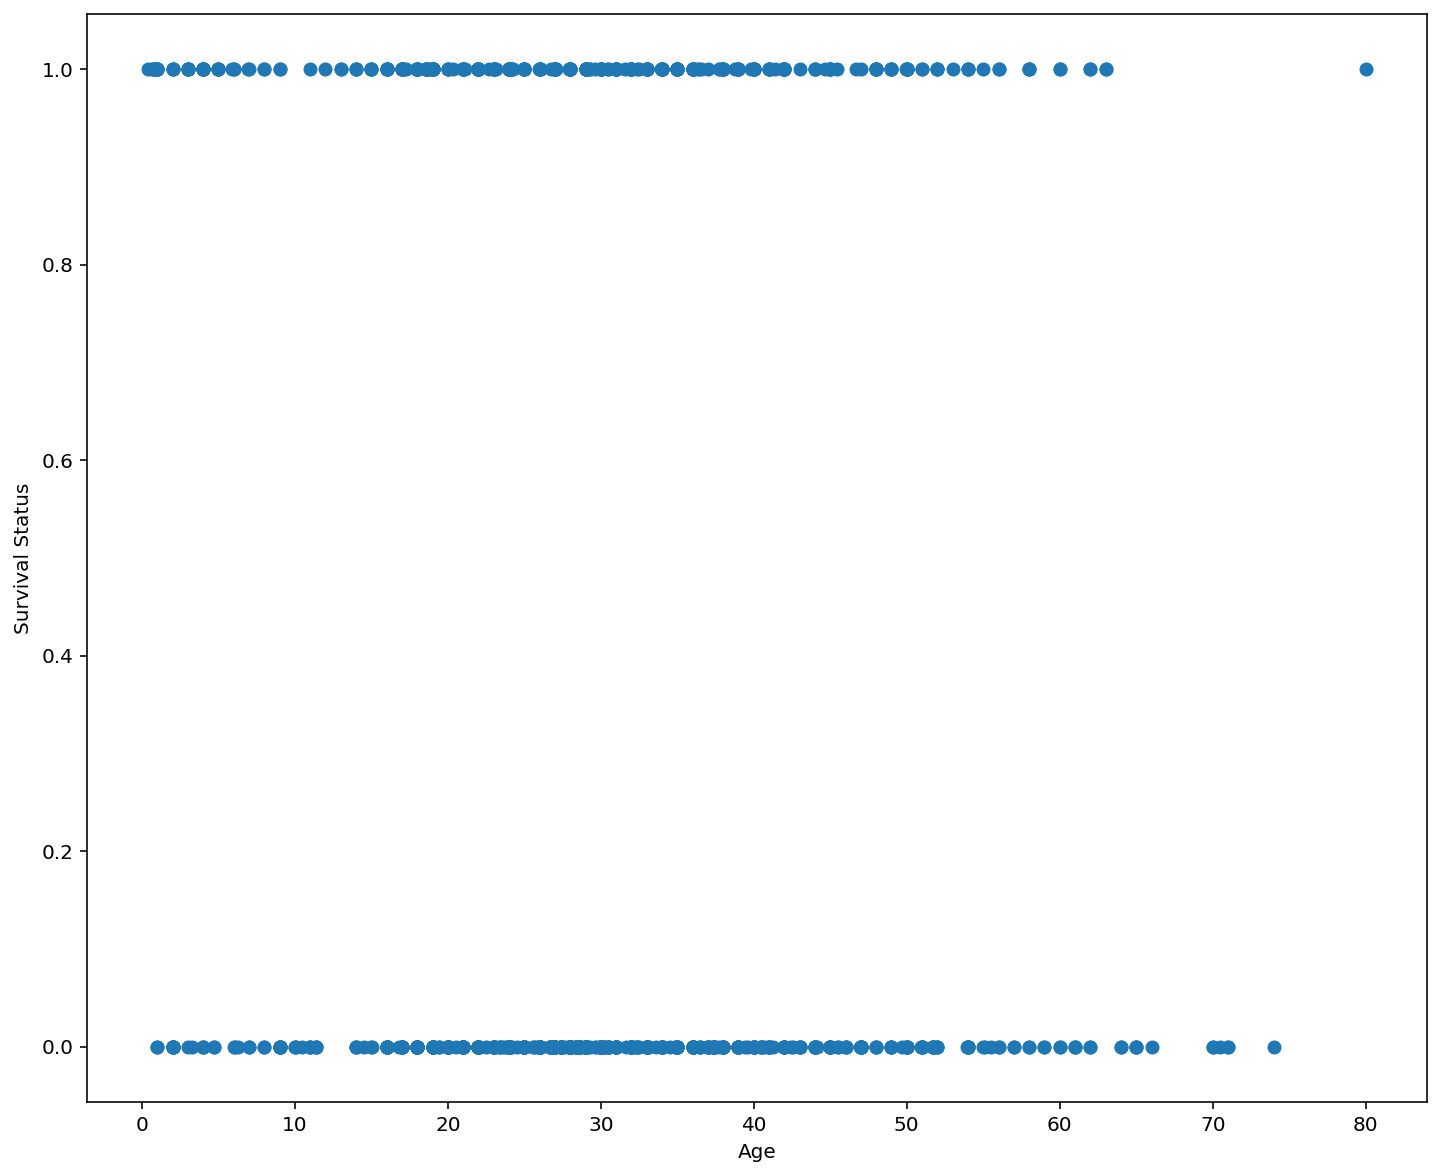

In [5]:
plt.subplots(figsize = (12,10))
plt.scatter(train.Age, train.Survived);
plt.xlabel("Age")
plt.ylabel('Survival Status');

Here the data points are not continuous; rather categorical. The two horizontal dot lines represent the survival status in the y-axis and age in the x-axis. This is probably not the best graph to explain logistic regression. For the convenience of understanding the model, let's look at a similar scatter plot with some characteristics.

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/39_blog_image_3.png" width="600">
<h5 align="right">SuperDataScience team</h5>

This chart clearly divides the binary categorical values in the x-axis, keeping most of the 0's on the left side, and 1's on the right side. So, now that the distinction is apparent, we can use our knowledge of linear regression and come up with a regression line. So, how can we apply a regression line to explain this data?

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/39_blog_image_4.png" width="800">
<h5 align="right">SuperDataScience team</h5>

As you can see from the chart above, The linear regression is probably not the best approach to take for categorical data. The Linear regression line barely aligns with the data points, and even if in some best-case scenario we were to use straight regression line, we would end up with a considerable error rate, which is super inconvenient. This is where logistic regression comes in. 

 #### This part of the kernel is a working progress. Please check back again for future updates.####

Logistic Regression notes for StatQuest: 

Logistic regression does not have the concept of residual and therefore can't calculate sum of the squared residuals to fit a line with the data. Instead it fit a line with the help of something called "maximum likelihood". Let's describe more about this 

Logistic regression uses a "S" shaped line to fit the data. 


In [6]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.7993
